# Data Collecting

In [ ]:
# installing library
!pip install imblearn
!pip install xgboost

# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 

# calling library function
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from datetime import datetime
from imblearn import under_sampling, over_sampling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load dataset
df_feature = pd.read_csv('Fraud_Transaction_DJP.txt', delimiter = "\t")

In [ ]:
# feature data 
df_feature.head(5)

Account_Number  Dollar_Amount Transaction_Type  \
0        12345679         188.56           swiped   
1        12345679         160.54            keyed   
2        12345679         153.24           swiped   
3        12345679         148.66            keyed   
4        12345679         174.03            keyed   

                                Store_Type Cardholder_Region         Country  \
0                           ATM Withdrawel                 E             USA   
1                                  Grocery                NE       Australia   
2                        Retail - Pharmacy                SW  European Union   
3  Communications - telephone and wireless                NW             USA   
4                               Spa/Beauty                SW            Asia   

  Transaction_Date Transaction_Time last transaction date  \
0       11/05/2005         17:41:14                   NaN   
1       11/07/2005         01:22:12            11/05/2005   
2       11/11/2005         12:14:55            11/07/2005   
3       11/13/2005         20:22:44            11/11/2005   
4       11/14/2005         23:13:39            11/13/2005   

  last transaction time Hours Since Last Transaction  \
0                   NaN                          NaN   
1              17:41:14                   31.682.778   
2              01:22:12                  106.878.611   
3              12:14:55                   56.130.278   
4              20:22:44                   26.848.611   

   Number Transactions in 3 hrs Fraudulent  \
0                             1          F   
1                             2          F   
2                             3          T   
3                             4          F   
4                             5          F   

   Total Amount of Transaction in 1 Day  #Of Transaction in 1Day  \
0                                188.56                        1   
1                                160.54                        1   
2                                153.24                        1   
3                                148.66                        1   
4                                174.03                        1   

  Avg. Per Transaction  Unnamed: 16  
0               188.56          NaN  
1               160.54          NaN  
2               153.24          NaN  
3               148.66          NaN  
4               174.03          NaN

In [ ]:
# chceking shape dataset
print("The shape of feature dataset : ", df_feature.shape)

The shape of feature dataset :  (55035, 17)


In [ ]:
# checking columns on dataset
df_feature.columns.tolist()

['Account_Number',
 'Dollar_Amount',
 'Transaction_Type',
 'Store_Type',
 'Cardholder_Region',
 'Country',
 'Transaction_Date',
 'Transaction_Time',
 'last transaction date',
 'last transaction time',
 'Hours Since Last Transaction',
 'Number Transactions in 3 hrs',
 'Fraudulent',
 'Total Amount of Transaction in 1 Day',
 '#Of Transaction in 1Day',
 'Avg. Per Transaction',
 'Unnamed: 16']

In [ ]:
# checking missing value
df_feature.isnull().sum()

Account_Number                              0
Dollar_Amount                               0
Transaction_Type                            0
Store_Type                                  0
Cardholder_Region                           0
Country                                     0
Transaction_Date                            0
Transaction_Time                            0
last transaction date                    2770
last transaction time                    2770
Hours Since Last Transaction             2770
Number Transactions in 3 hrs                0
Fraudulent                                  0
Total Amount of Transaction in 1 Day        0
#Of Transaction in 1Day                     0
Avg. Per Transaction                        0
Unnamed: 16                             55035
dtype: int64

In [ ]:
# checking duplicate values
df_feature.duplicated().sum()

0

In [ ]:
# checking information of dataset
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55035 entries, 0 to 55034
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Account_Number                        55035 non-null  int64  
 1   Dollar_Amount                         55035 non-null  float64
 2   Transaction_Type                      55035 non-null  object 
 3   Store_Type                            55035 non-null  object 
 4   Cardholder_Region                     55035 non-null  object 
 5   Country                               55035 non-null  object 
 6   Transaction_Date                      55035 non-null  object 
 7   Transaction_Time                      55035 non-null  object 
 8   last transaction date                 52265 non-null  object 
 9   last transaction time                 52265 non-null  object 
 10  Hours Since Last Transaction          52265 non-null  object 
 11  Number Transact

In [ ]:
# checking summary of dataset
df_feature.describe()

Account_Number  Dollar_Amount  Number Transactions in 3 hrs  \
count    5.503500e+04   55035.000000                  55035.000000   
mean     1.234769e+07     166.554005                     20.647951   
std      2.556213e+03      31.571067                     21.578452   
min      1.234568e+07      18.740000                      1.000000   
25%      1.234636e+07     144.890000                      6.000000   
50%      1.234705e+07     163.300000                     14.000000   
75%      1.234773e+07     186.990000                     28.000000   
max      1.235576e+07     373.440000                    232.000000   

       Total Amount of Transaction in 1 Day  #Of Transaction in 1Day  \
count                          55035.000000             55035.000000   
mean                             599.623494                 3.600672   
std                              451.033781                 2.607799   
min                               18.740000                 1.000000   
25%                              293.265000                 2.000000   
50%                              480.100000                 3.000000   
75%                              780.200000                 5.000000   
max                             3413.080000                20.000000   

       Unnamed: 16  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

# Data Preprocessing

In [ ]:
# fixing column names
df_feature.columns = df_feature.columns.str.replace(' ', '_')

In [ ]:
# drop columns with 100% missing values
df_feature = df_feature.drop(['Unnamed:_16','Number_Transactions_in_3_hrs'], axis=1)

In [ ]:
# fixing dataset time
df_feature.Transaction_Date = pd.to_datetime(df_feature.Transaction_Date, infer_datetime_format=True)
df_feature.last_transaction_date = pd.to_datetime(df_feature.last_transaction_date, infer_datetime_format=True)

In [ ]:
# Create new feature to flag weekend transaction
def is_weekend(tx_datetime):
    
    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5
    
    return int(is_weekend)

# implementing the function
%time df_feature['Trans_Weekend']=df_feature.Transaction_Date.apply(is_weekend)

CPU times: user 177 ms, sys: 7.76 ms, total: 185 ms
Wall time: 184 ms


In [ ]:
# fixing format of data date 
df_feature['Transaction_Time'] = pd.to_datetime(df_feature['Transaction_Time'], format='%H:%M:%S')
df_feature['last_transaction_time'] = pd.to_datetime(df_feature['last_transaction_time'], format='%H:%M:%S')

# fixing format of data time 
df_feature['Transaction_Time'] = df_feature['Transaction_Time'].dt.time
df_feature['last_transaction_time'] = df_feature['last_transaction_time'].dt.time

In [ ]:
# Create new feature to flag night transaction
def is_night(tx_datetime):
    
    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour>=18 or tx_hour<=6
    return int(is_night)

# implementing the function
%time df_feature['Trans_Night']=df_feature.Transaction_Time.apply(is_night)

CPU times: user 52.3 ms, sys: 884 µs, total: 53.2 ms
Wall time: 93.4 ms


In [ ]:
df_feature['Trans_Night'] = df_feature['Trans_Night'].replace([0,1], ['Day','Night',])
df_feature['Trans_Weekend'] = df_feature['Trans_Weekend'].replace([0,1], ['Weekday','Weekend',])

In [ ]:
# showing the dataset
df_feature

Account_Number  Dollar_Amount Transaction_Type  \
0            12345679         188.56           swiped   
1            12345679         160.54            keyed   
2            12345679         153.24           swiped   
3            12345679         148.66            keyed   
4            12345679         174.03            keyed   
...               ...            ...              ...   
55030        12348151         237.01           swiped   
55031        12348152         183.69           swiped   
55032        12348152         216.31           swiped   
55033        12348152         203.12            keyed   
55034        12348152         201.50           swiped   

                                    Store_Type Cardholder_Region  \
0                               ATM Withdrawel                 E   
1                                      Grocery                NE   
2                            Retail - Pharmacy                SW   
3      Communications - telephone and wireless                NW   
4                                   Spa/Beauty                SW   
...                                        ...               ...   
55030                    Professional Services                SE   
55031                                  Medical                 W   
55032                                    Hotel                SW   
55033                                    Other                NE   
55034                                    Hotel                 E   

              Country Transaction_Date Transaction_Time last_transaction_date  \
0                 USA       2005-11-05         17:41:14                   NaT   
1           Australia       2005-11-07         01:22:12            2005-11-05   
2      European Union       2005-11-11         12:14:55            2005-11-07   
3                 USA       2005-11-13         20:22:44            2005-11-11   
4                Asia       2005-11-14         23:13:39            2005-11-13   
...               ...              ...              ...                   ...   
55030            Asia       2005-11-12         10:18:35            2005-11-10   
55031       Australia       2005-11-03         01:12:31            2005-11-02   
55032             USA       2005-11-05         22:07:48            2005-11-05   
55033             USA       2005-11-05         22:57:10            2005-11-05   
55034       Australia       2005-11-11         18:53:44            2005-11-11   

      last_transaction_time Hours_Since_Last_Transaction Fraudulent  \
0                       NaT                          NaN          F   
1                  17:41:14                   31.682.778          F   
2                  01:22:12                  106.878.611          T   
3                  12:14:55                   56.130.278          F   
4                  20:22:44                   26.848.611          F   
...                     ...                          ...        ...   
55030              21:16:55                   37.027.778          F   
55031              21:56:00                    3.275.278          F   
55032              21:29:12                     0.643333          F   
55033              22:39:29                     0.294722          F   
55034              12:50:01                    6.061.944          F   

       Total_Amount_of_Transaction_in_1_Day  #Of_Transaction_in_1Day  \
0                                    188.56                        1   
1                                    160.54                        1   
2                                    153.24                        1   
3                                    148.66                        1   
4                                    174.03                        1   
...                                     ...                      ...   
55030                                629.41                        3   
55031                                792.27                        4   
55032                          

# Exploratory Data Analysis

In [ ]:
# function for distribution of percentage data
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 15)
    plt.show()

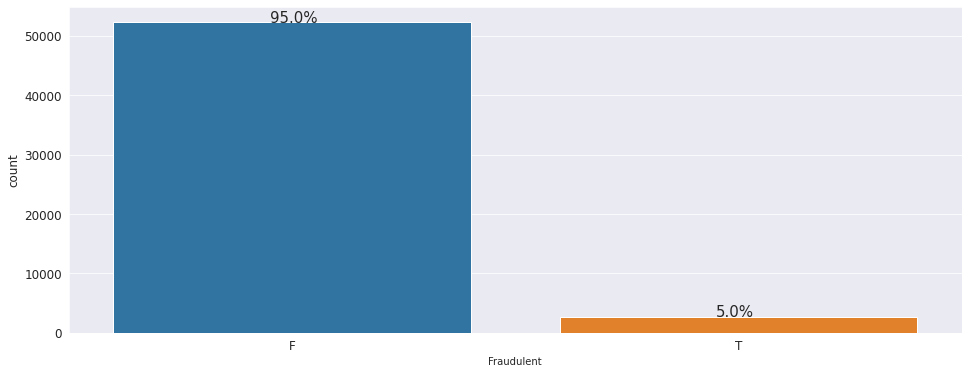

In [ ]:
# visualization of data Fraudulent
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
ax = sns.countplot(data=df_feature,
                   x=df_feature['Fraudulent'],
                   palette="tab10")
plt.xticks(size=12)
plt.xlabel('Fraudulent')
plt.yticks(size=12)
plt.ylabel('count', size=12)

without_hue(ax, df_feature.Fraudulent)

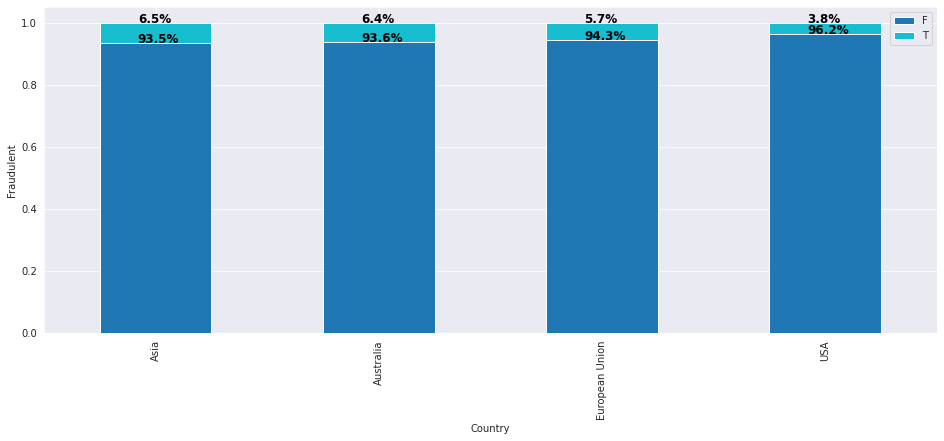

In [ ]:
# percentage the Fraudulent by Country

cross_tab = pd.crosstab(index=df_feature['Country'],
                        columns=df_feature['Fraudulent'])

cross_tab_prop = pd.crosstab(index=df_feature['Country'],
                             columns=df_feature['Fraudulent'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="tab10", 
                    figsize=(16, 6))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Country")
plt.ylabel("Fraudulent")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.08,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

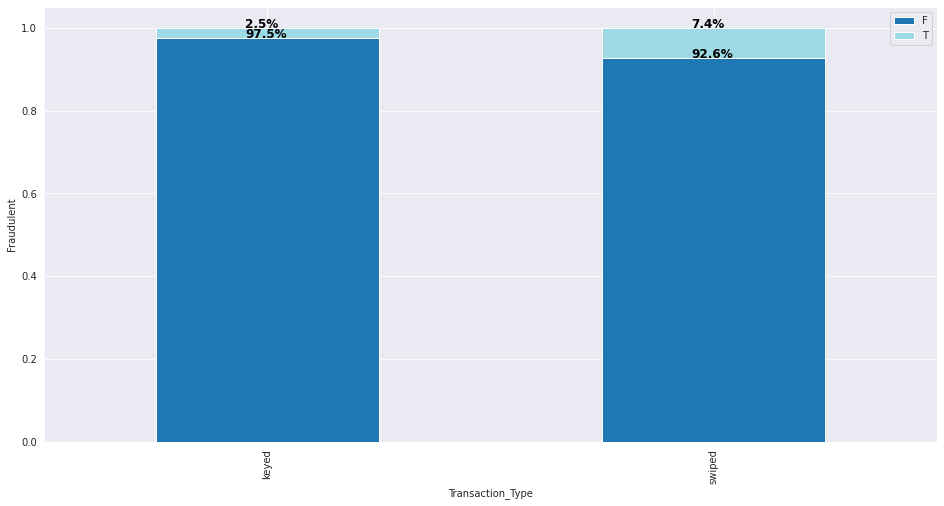

In [ ]:
# percentage the Fraudulent by Transaction Type

cross_tab = pd.crosstab(index=df_feature['Transaction_Type'],
                        columns=df_feature['Fraudulent'])

cross_tab_prop = pd.crosstab(index=df_feature['Transaction_Type'],
                             columns=df_feature['Fraudulent'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="tab20", 
                    figsize=(16, 8))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Transaction_Type")
plt.ylabel("Fraudulent")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.05,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
data = df_feature.groupby(
    ['Account_Number', 'Transaction_Date', 'Transaction_Time']
).agg({'Account_Number':pd.Series.unique,
       'Dollar_Amount': pd.Series.unique,
       'Total_Amount_of_Transaction_in_1_Day':pd.Series.unique,
       '#Of_Transaction_in_1Day':pd.Series.mean})
data = pd.DataFrame(data)
data = data.drop(data.columns[[0]], axis=1)
data.head(10)

Dollar_Amount  \
Account_Number Transaction_Date Transaction_Time                 
12345679       2005-11-05       17:41:14                188.56   
               2005-11-07       01:22:12                160.54   
               2005-11-11       12:14:55                153.24   
               2005-11-13       20:22:44                148.66   
               2005-11-14       23:13:39                174.03   
12345680       2005-11-01       07:05:17                171.95   
                                11:48:31                171.72   
               2005-11-08       15:09:52                147.31   
               2005-11-11       21:33:10                164.39   
               2005-11-14       23:31:03                143.11   

                                                  Total_Amount_of_Transaction_in_1_Day  \
Account_Number Transaction_Date Transaction_Time                                         
12345679       2005-11-05       17:41:14                                        188.56   
               2005-11-07       01:22:12                                        160.54   
               2005-11-11       12:14:55                                        153.24   
               2005-11-13       20:22:44                                        148.66   
               2005-11-14       23:13:39                                        174.03   
12345680       2005-11-01       07:05:17                                        343.67   
                                11:48:31                                        343.67   
               2005-11-08       15:09:52                                        147.31   
               2005-11-11       21:33:10                                        164.39   
               2005-11-14       23:31:03                                        143.11   

                                                  #Of_Transaction_in_1Day  
Account_Number Transaction_Date Transaction_Time                           
12345679       2005-11-05       17:41:14                              1.0  
               2005-11-07       01:22:12                              1.0  
               2005-11-11       12:14:55                              1.0  
               2005-11-13       20:22:44                              1.0  
               2005-11-14       23:13:39                              1.0  
12345680       2005-11-01       07:05:17                              2.0  
                                11:48:31                              2.0  
               2005-11-08       15:09:52                              1.0  
               2005-11-11       21:33:10                              1.0  
               2005-11-14       23:31:03                              1.0

In [ ]:
data = data.groupby(
    'Account_Number'
).agg({'Total_Amount_of_Transaction_in_1_Day': np.mean,
       '#Of_Transaction_in_1Day': np.mean,
       'Dollar_Amount': np.mean})
data = pd.DataFrame(data)

data = data.rename({'Total_Amount_of_Transaction_in_1_Day': 'Average_Total_of_Transaction_in_Account',
                    '#Of_Transaction_in_1Day': 'Average_Transaction_in_1Day',
                    'Dollar_Amount': 'Average_Dollar_Amount'}, axis=1).sort_values(["Average_Total_of_Transaction_in_Account"],ascending=False)
data.head(10).style.background_gradient(cmap='Greens',subset=["Average_Transaction_in_1Day"]).background_gradient(cmap='Greens',subset=["Average_Total_of_Transaction_in_Account"]).background_gradient(cmap='Greens',subset=["Average_Dollar_Amount"])

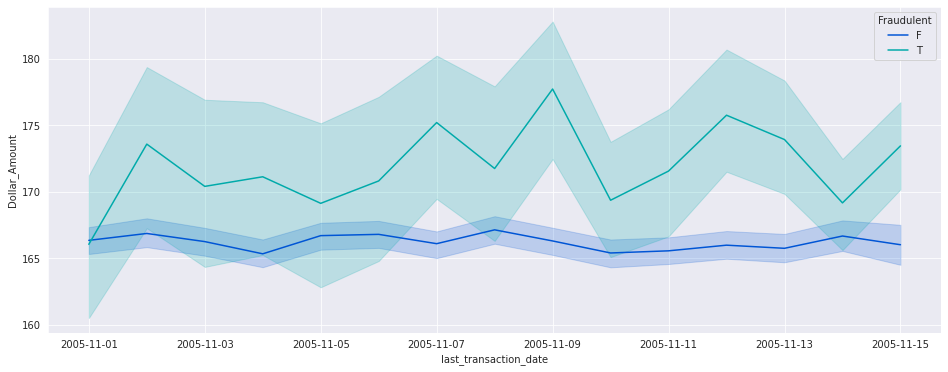

In [ ]:
# select visualization last_transaction_date by Dollar Amount by Fraudulent
plt.figure(figsize = (16, 6))
sns.lineplot(x = df_feature['last_transaction_date'], 
             y = df_feature['Dollar_Amount'],
             hue=df_feature['Fraudulent'],
             palette="winter");

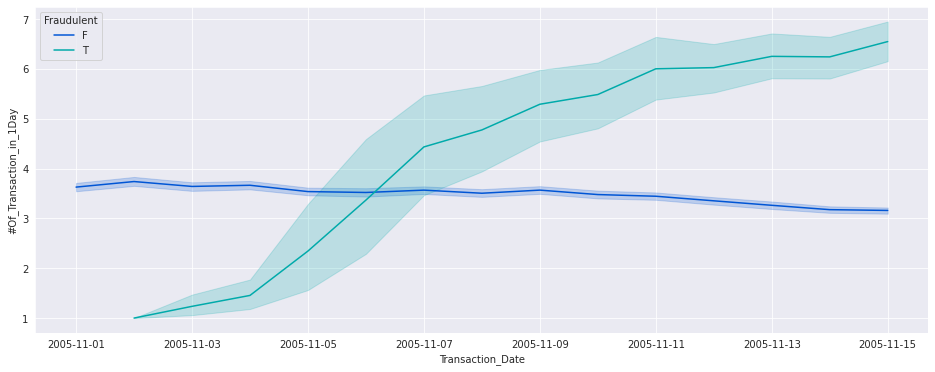

In [ ]:
# select visualization Transaction Date by Dollar Amount by Fraudulent
plt.figure(figsize = (16, 6))
sns.lineplot(x = df_feature['Transaction_Date'], 
             y = df_feature['#Of_Transaction_in_1Day'],
             hue=df_feature['Fraudulent'],
             palette="winter");

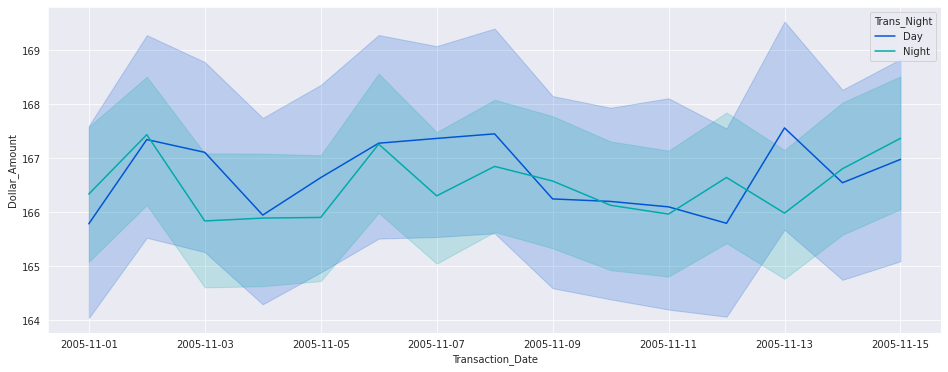

In [ ]:
# select visualization Transaction Date by Dollar Amount seprate Transaction Night
plt.figure(figsize = (16, 6))
sns.lineplot(x = df_feature['Transaction_Date'], 
             y = df_feature['Dollar_Amount'],
             hue=df_feature['Trans_Night'],
             palette="winter");

Text(0, 0.5, 'Fraudulent')

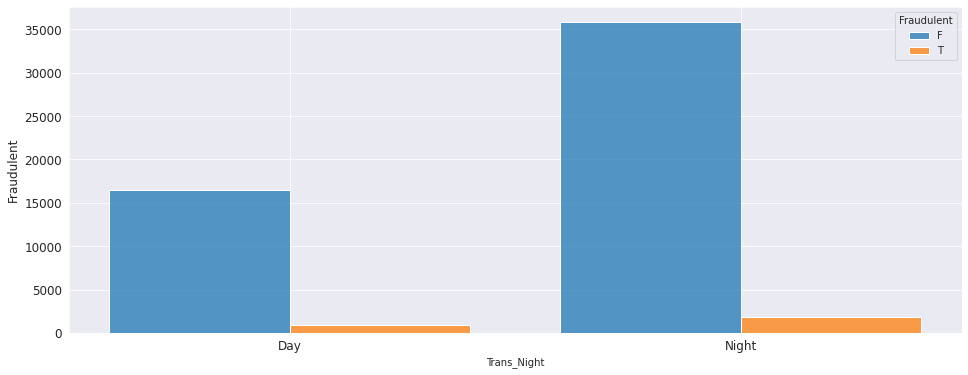

In [ ]:
# visualization of data Fraudulent by Trans Night
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
ax = sns.histplot(data=df_feature,
                   x=df_feature['Trans_Night'],
                   hue=df_feature['Fraudulent'],
                   legend=True,
                   shrink=.8,
                   multiple="dodge",
                   palette="tab10")
plt.xticks(size=12)
plt.xlabel('Trans_Night')
plt.yticks(size=12)
plt.ylabel('Fraudulent', size=12)

# without_hue(ax, df_feature.Trans_Night)

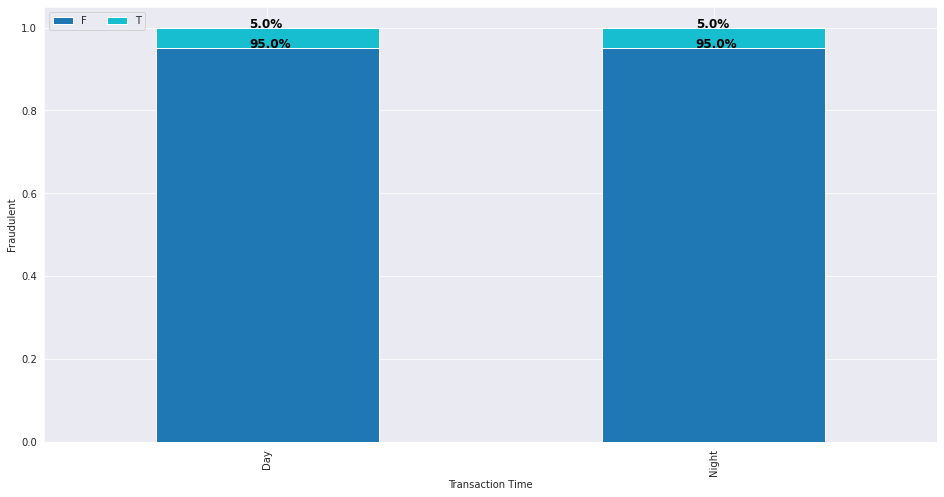

In [ ]:
# percentage the Fraudulent by Trans Night

cross_tab = pd.crosstab(index=df_feature['Trans_Night'],
                        columns=df_feature['Fraudulent'])

cross_tab_prop = pd.crosstab(index=df_feature['Trans_Night'],
                             columns=df_feature['Fraudulent'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="tab10", 
                    figsize=(16, 8))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Transaction Time")
plt.ylabel("Fraudulent")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.04,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
# select data account number 12347086 by 'Account_Number','Dollar_Amount','Transaction_Date','Transaction_Time','#Of_Transaction_in_1Day','Number_Transactions_in_3_hrs'
data_selection = df_feature.loc[df_feature['Account_Number'] == 12347086, ['Account_Number','Dollar_Amount','Transaction_Date','Transaction_Time','#Of_Transaction_in_1Day']].sort_values(ascending=True, by=['Transaction_Date','Transaction_Time'])
data_selection.style.background_gradient(cmap='Greens',subset=['Dollar_Amount']).background_gradient(cmap='Greens',subset=["#Of_Transaction_in_1Day"])

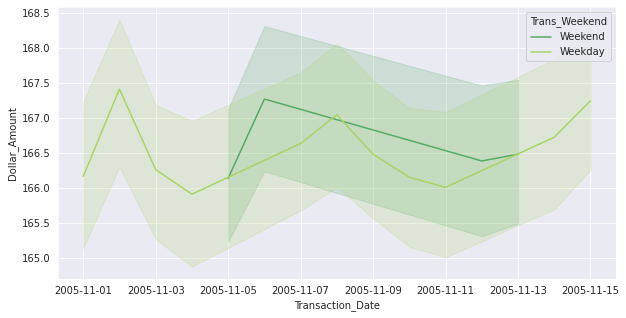

In [ ]:
# select visualization Transaction Date by Dollar Amount seprate Transaction Night
plt.figure(figsize = (10, 5))
sns.lineplot(x = df_feature['Transaction_Date'], 
             y = df_feature['Dollar_Amount'],
             hue=df_feature['Trans_Weekend'],
             palette="summer");

Text(0, 0.5, 'Fraudulent')

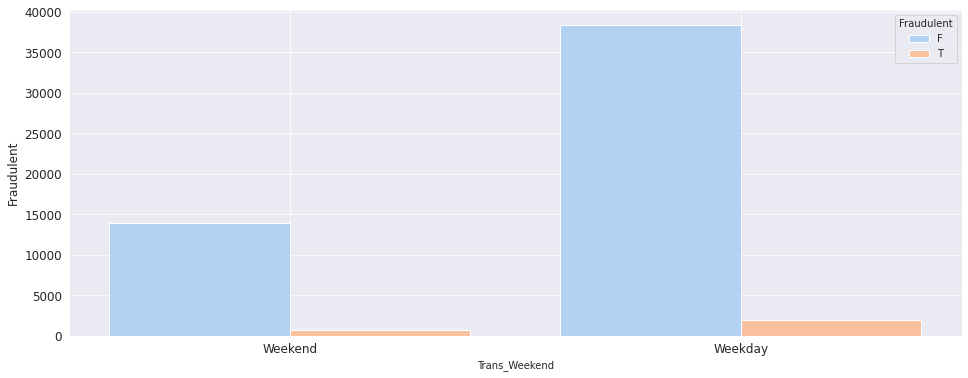

In [ ]:
# visualization of data Fraudulent by Trans Night
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
ax = sns.histplot(data=df_feature,
                   x=df_feature['Trans_Weekend'],
                   hue=df_feature['Fraudulent'],
                   legend=True,
                   shrink=.8,
                   multiple="dodge",
                   palette="pastel")
plt.xticks(size=12)
plt.xlabel('Trans_Weekend')
plt.yticks(size=12)
plt.ylabel('Fraudulent', size=12)

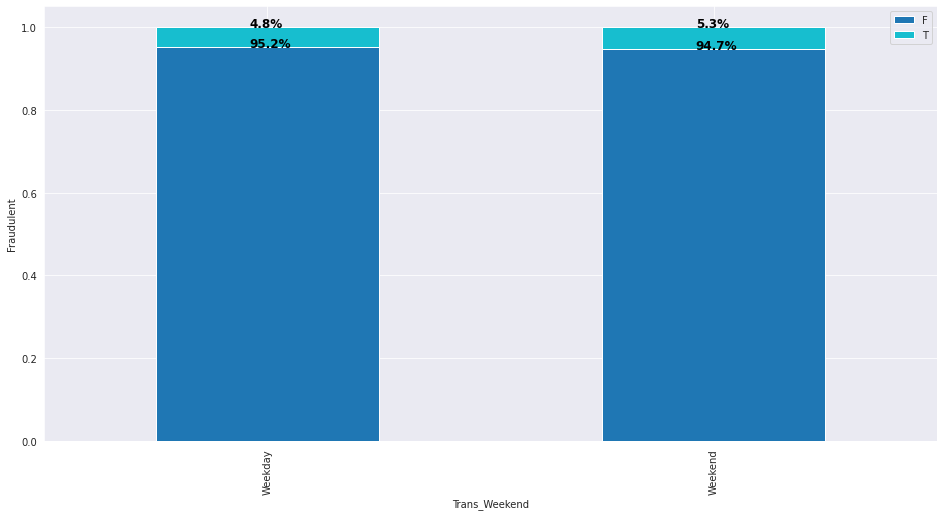

In [ ]:
# percentage the Fraudulent by Trans Night

cross_tab = pd.crosstab(index=df_feature['Trans_Weekend'],
                        columns=df_feature['Fraudulent'])

cross_tab_prop = pd.crosstab(index=df_feature['Trans_Weekend'],
                             columns=df_feature['Fraudulent'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="tab10", 
                    figsize=(16, 8))

plt.legend(loc="upper right", ncol=1)
plt.xlabel("Trans_Weekend")
plt.ylabel("Fraudulent")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.04,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

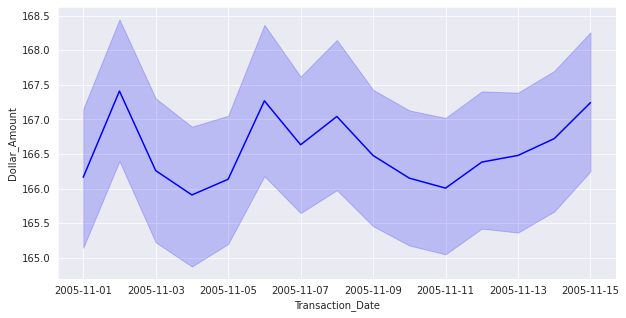

In [ ]:
# select visualization for account number 12347956 by Transaction Date and Dollar Amount
example_transaction = df_feature[df_feature['Account_Number'] == 12347956]
plt.figure(figsize = (10, 5))
sns.lineplot(x = df_feature['Transaction_Date'], 
             y = df_feature['Dollar_Amount'],
             color="blue");

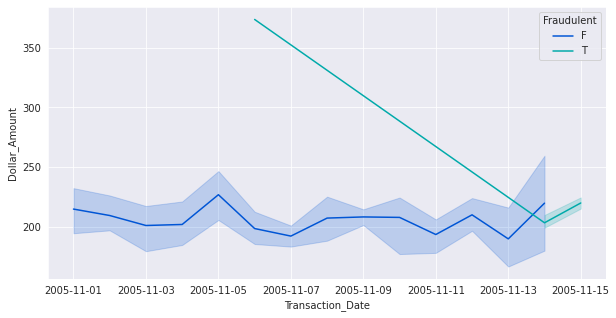

In [ ]:
# select visualization Account Number 12347956 Transaction Date by Dollar Amount seprate Fraudulent
example_transaction = df_feature[df_feature['Account_Number'] == 12347956]
plt.figure(figsize = (10, 5))
sns.lineplot(x = example_transaction['Transaction_Date'], 
             y = example_transaction['Dollar_Amount'],
             hue = example_transaction['Fraudulent'],
             palette="winter");

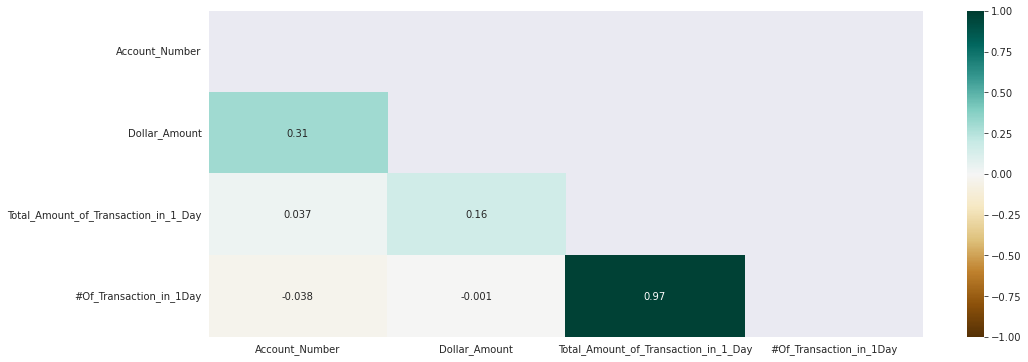

In [ ]:
# heatmap correlation all features
import numpy as np

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_feature.corr(), dtype=bool))
sns.heatmap(df_feature.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

## RFM Analysis

### Recency

In [ ]:
df_recency = df_feature.groupby(by='Account_Number',
                        as_index=False)['Transaction_Date'].max()
df_recency.columns = ['Account_Number', 'LastTransactionDate']
recent_date = df_recency['LastTransactionDate'].max()
df_recency['Recency'] = df_recency['LastTransactionDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head(5)

Account_Number LastTransactionDate  Recency
0        12345679          2005-11-14        1
1        12345680          2005-11-15        0
2        12345681          2005-11-14        1
3        12345682          2005-11-15        0
4        12345683          2005-11-15        0

### Frequency

In [ ]:
frequency_df = df_feature.drop_duplicates().groupby(by=['Account_Number'], as_index=False)['Transaction_Date'].count()
frequency_df.columns = ['Account_Number', 'Frequency']
frequency_df.head()

Account_Number  Frequency
0        12345679          5
1        12345680          6
2        12345681         18
3        12345682         52
4        12345683         12

### Monetary

In [ ]:
df_feature['Total'] = df_feature['Dollar_Amount']
monetary_df = df_feature.groupby(by='Account_Number', as_index=False)['Total'].mean()
monetary_df.columns = ['Account_Number', 'Monetary']
monetary_df.head()

Account_Number    Monetary
0        12345679  165.006000
1        12345680  161.606667
2        12345681  162.716667
3        12345682  173.356538
4        12345683  169.898333

In [ ]:
# Merger Recency, Frequency, and Monetary Columns
rf_df = df_recency.merge(frequency_df, on='Account_Number')
rfm_df = rf_df.merge(monetary_df, on='Account_Number').drop(
    columns='LastTransactionDate')
rfm_df.head()

Account_Number  Recency  Frequency    Monetary
0        12345679        1          5  165.006000
1        12345680        0          6  161.606667
2        12345681        1         18  162.716667
3        12345682        0         52  173.356538
4        12345683        0         12  169.898333

In [ ]:
# The rank Account Number
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

Account_Number  Recency  Frequency    Monetary  R_rank_norm  F_rank_norm  \
0        12345679        1          5  165.006000    47.147525    21.725979   
1        12345680        0          6  161.606667   100.000000    25.462633   
2        12345681        1         18  162.716667    47.147525    60.444840   
3        12345682        0         52  173.356538   100.000000    93.487544   
4        12345683        0         12  169.898333   100.000000    46.672598   

   M_rank_norm  
0    21.725979  
1    25.462633  
2    60.444840  
3    93.487544  
4    46.672598

In [ ]:
# Scorring RFM_Score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Account_Number', 'RFM_Score']].head(7)

Account_Number  RFM_Score
0        12345679       1.28
1        12345680       1.83
2        12345681       2.92
3        12345682       4.72
4        12345683       2.73
5        12345684       3.40
6        12345685       4.62

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Account_Number', 'RFM_Score', 'Customer_segment']].head(10)

Account_Number  RFM_Score       Customer_segment
0        12345679       1.28         Lost Customers
1        12345680       1.83    Low Value Customers
2        12345681       2.92    Low Value Customers
3        12345682       4.72          Top Customers
4        12345683       2.73    Low Value Customers
5        12345684       3.40  Medium Value Customer
6        12345685       4.62          Top Customers
7        12345686       2.73    Low Value Customers
8        12345687       3.49  Medium Value Customer
9        12345688       0.97         Lost Customers

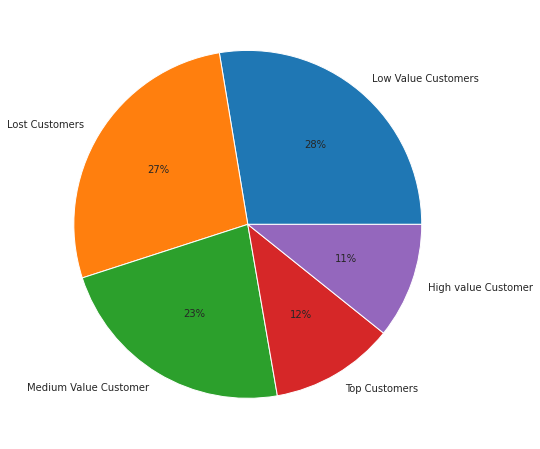

In [ ]:
plt.figure(figsize = (10, 8))
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# Data Preparation

In [ ]:
# Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# aggregate data missing value
missing_values_table(df_feature)

Your selected dataframe has 18 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
last_transaction_date                   2770                5.0
last_transaction_time                   2770                5.0
Hours_Since_Last_Transaction            2770                5.0

In [ ]:
# As the number of missing values is so low in the 'Maximum Open df_feature' I will drop them.

for i in df_feature['last_transaction_date'][df_feature['last_transaction_date'].isnull() == True].index:
    df_feature.drop(labels=i, inplace=True)

for i in df_feature['last_transaction_time'][df_feature['last_transaction_time'].isnull() == True].index:
    df_feature.drop(labels=i, inplace=True)

for i in df_feature['Hours_Since_Last_Transaction'][df_feature['Hours_Since_Last_Transaction'].isnull() == True].index:
    df_feature.drop(labels=i, inplace=True)

missing_values_table(df_feature)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [ ]:
# drop unrelatable feature for building model
df_feature = df_feature.drop(['Account_Number', 'Transaction_Date', 'Transaction_Time',
                              'last_transaction_date', 'last_transaction_time', 'Total', 'Hours_Since_Last_Transaction', 'Avg._Per_Transaction'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

# select feature category
df_obj = df_feature.select_dtypes(include='object')

# Encoding the variable
df_obj = df_obj.apply(lambda x: d[x.name].fit_transform(x))
df_obj

Transaction_Type  Store_Type  Cardholder_Region  Country  Fraudulent  \
1                     0           5                  2        1           0   
2                     1          21                  6        2           1   
3                     0           1                  3        3           0   
4                     0          24                  6        0           0   
6                     0          25                  3        3           0   
...                 ...         ...                ...      ...         ...   
55030                 1           9                  5        0           0   
55031                 1           7                  7        1           0   
55032                 1           6                  6        3           0   
55033                 0           8                  2        3           0   
55034                 1           6                  0        1           0   

       Trans_Weekend  Trans_Night  
1                  0            1  
2                  0            0  
3                  1            1  
4                  0            1  
6                  0            0  
...              ...          ...  
55030              1            0  
55031              0            1  
55032              1            1  
55033              1            1  
55034              0            1  

[52265 rows x 7 columns]

In [ ]:
# selext coulmn data types float
df_float = df_feature.select_dtypes(include='float')
df_float

Dollar_Amount  Total_Amount_of_Transaction_in_1_Day
1             160.54                                160.54
2             153.24                                153.24
3             148.66                                148.66
4             174.03                                174.03
6             171.72                                343.67
...              ...                                   ...
55030         237.01                                629.41
55031         183.69                                792.27
55032         216.31                                978.33
55033         203.12                                978.33
55034         201.50                                611.26

[52265 rows x 2 columns]

In [ ]:
# merge column data float and categories
df_feature = pd.merge(df_float, df_obj, left_index=True, right_index=True)
df_feature

Dollar_Amount  Total_Amount_of_Transaction_in_1_Day  Transaction_Type  \
1             160.54                                160.54                 0   
2             153.24                                153.24                 1   
3             148.66                                148.66                 0   
4             174.03                                174.03                 0   
6             171.72                                343.67                 0   
...              ...                                   ...               ...   
55030         237.01                                629.41                 1   
55031         183.69                                792.27                 1   
55032         216.31                                978.33                 1   
55033         203.12                                978.33                 0   
55034         201.50                                611.26                 1   

       Store_Type  Cardholder_Region  Country  Fraudulent  Trans_Weekend  \
1               5                  2        1           0              0   
2              21                  6        2           1              0   
3               1                  3        3           0              1   
4              24                  6        0           0              0   
6              25                  3        3           0              0   
...           ...                ...      ...         ...            ...   
55030           9                  5        0           0              1   
55031           7                  7        1           0              0   
55032           6                  6        3           0              1   
55033           8                  2        3           0              1   
55034           6                  0        1           0              0   

       Trans_Night  
1                1  
2                0  
3                1  
4                1  
6                0  
...            ...  
55030            0  
55031            1  
55032            1  
55033            1  
55034            1  

[52265 rows x 9 columns]

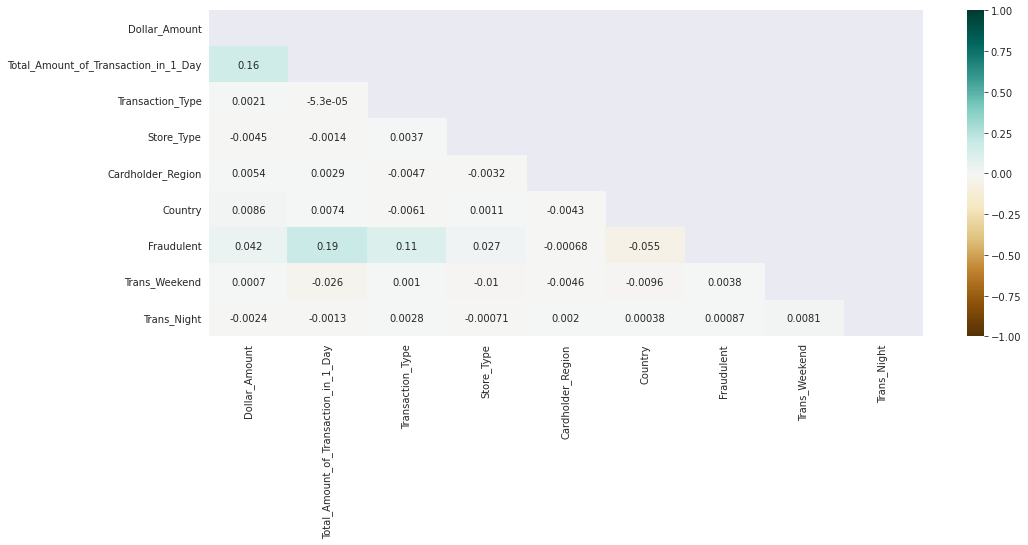

In [ ]:
# plot correlation heatmap
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_feature.corr(), dtype=bool))
sns.heatmap(df_feature.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [ ]:
# Creating data feature and Target for modelling
X = df_feature.drop(['Fraudulent'],axis=1)
y = df_feature['Fraudulent']

In [ ]:
#apply SelectKBest class to extract scoring feature
# RFE 
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

                                  Specs          Score
1  Total_Amount_of_Transaction_in_1_Day  619345.549468
0                         Dollar_Amount     541.211572
2                      Transaction_Type     337.602298
3                            Store_Type     167.982641
5                               Country     106.368921
6                         Trans_Weekend       0.538681
4                     Cardholder_Region       0.037369
7                           Trans_Night       0.012404


In [ ]:
# split dataset 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47038, 8), (5227, 8), (47038,), (5227,))

# Building Model

## Logistics Regression

In [ ]:
# Logistics regression model
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(solver='lbfgs', max_iter=1000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.729


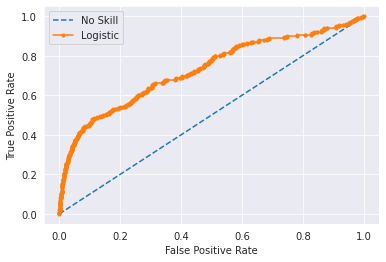

In [ ]:
# predict accuracy train dataset
lr_probs = model_LR.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
lr_ns_auc = roc_auc_score(y_test, ns_probs)
lr_sc_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (lr_ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_sc_auc))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.041 auc=0.230


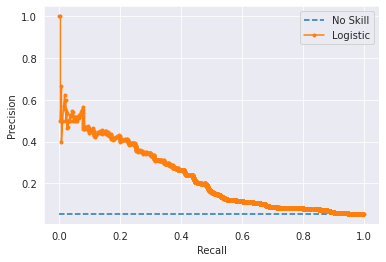

In [ ]:
# Recall and Precision model
yhat = model_LR.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest Classification

In [ ]:
# Random Forest Classification
model_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=100, random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=200,
                       random_state=42)

In [ ]:
# scoring data test
model_LR.score(X_test, y_test)

0.9466233020853262

In [ ]:
# import time library for importance feature

import time
import numpy as np

start_time = time.time()
importances = model_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.101 seconds


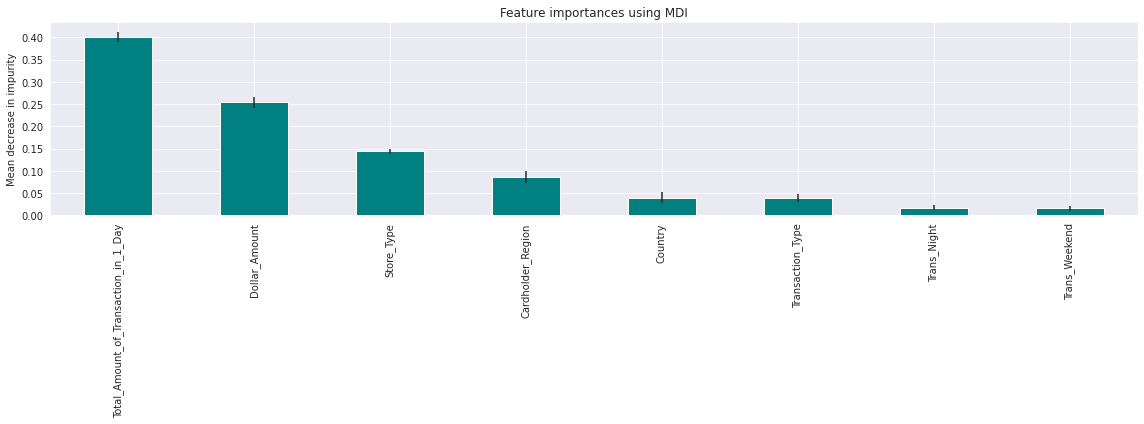

In [ ]:
# visualize importance feature

forest_importances = pd.Series(importances, index=X_train.iloc[0].index)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
forest_importances.plot.bar(yerr=std, ax=ax, color='teal')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.822


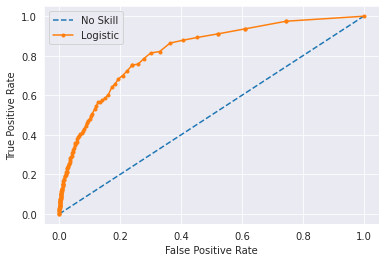

In [ ]:
# model Random Forest

# predict accuracy train dataset
lr_probs = model_RF.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
rf_ns_auc = roc_auc_score(y_test, ns_probs)
rf_sc_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (rf_ns_auc))
print('Logistic: ROC AUC=%.3f' % (rf_sc_auc))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.115 auc=0.251


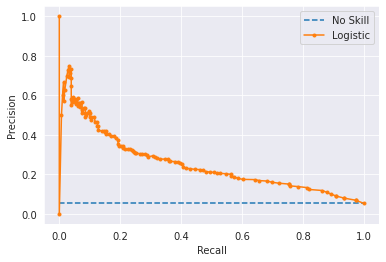

In [ ]:
yhat = model_RF.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# model evaluation
predictions=model_RF.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4947
           1       0.56      0.06      0.12       280

    accuracy                           0.95      5227
   macro avg       0.76      0.53      0.54      5227
weighted avg       0.93      0.95      0.93      5227



## Naive Bayes

In [ ]:
# NaiveBayes Model
model_NB = GaussianNB()
model_naive = model_NB.fit(X_train, y_train)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.788


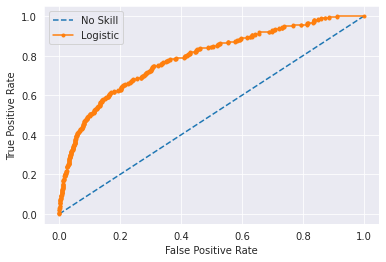

In [ ]:
# model Random Forest
# predict accuracy train dataset
lr_probs = model_NB.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
nb_ns_auc = roc_auc_score(y_test, ns_probs)
nb_sc_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (nb_ns_auc))
print('Logistic: ROC AUC=%.3f' % (nb_sc_auc))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.257 auc=0.251


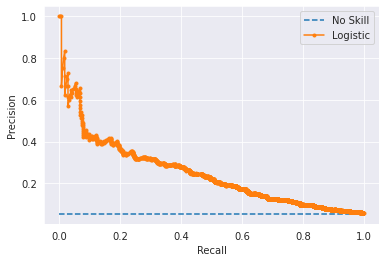

In [ ]:
# Recall and Precision
yhat = model_NB.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
nb_f1, nb_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# model evaluation
predictions=model_NB.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4947
           1       0.38      0.19      0.26       280

    accuracy                           0.94      5227
   macro avg       0.67      0.59      0.61      5227
weighted avg       0.92      0.94      0.93      5227



## XGBoost

In [ ]:
# XBoost 
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train.values, y_train, eval_set=[(X_train.values, y_train), (X_test.values, y_test)])

[0]	validation_0-error:0.050853	validation_1-error:0.052803
[1]	validation_0-error:0.05081	validation_1-error:0.052611
[2]	validation_0-error:0.050704	validation_1-error:0.052611
[3]	validation_0-error:0.050704	validation_1-error:0.052611
[4]	validation_0-error:0.050704	validation_1-error:0.052611
[5]	validation_0-error:0.050704	validation_1-error:0.052611
[6]	validation_0-error:0.050704	validation_1-error:0.052611
[7]	validation_0-error:0.050725	validation_1-error:0.052803
[8]	validation_0-error:0.050746	validation_1-error:0.052803
[9]	validation_0-error:0.05132	validation_1-error:0.053377
[10]	validation_0-error:0.051214	validation_1-error:0.053377
[11]	validation_0-error:0.051469	validation_1-error:0.053377
[12]	validation_0-error:0.051469	validation_1-error:0.053377
[13]	validation_0-error:0.051469	validation_1-error:0.053377
[14]	validation_0-error:0.051256	validation_1-error:0.052994
[15]	validation_0-error:0.051405	validation_1-error:0.053185
[16]	validation_0-error:0.051448	val

XGBClassifier()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.847


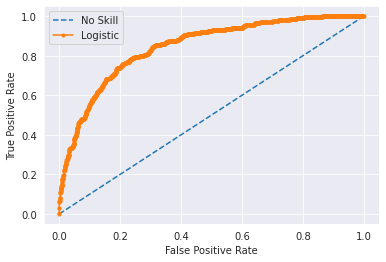

In [ ]:
# model Xboost
# predict accuracy train dataset
lr_probs = model_xgb.predict_proba(X_test.values)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
xb_ns_auc = roc_auc_score(y_test, ns_probs)
xb_sc_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (xb_ns_auc))
print('Logistic: ROC AUC=%.3f' % (xb_sc_auc))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.120 auc=0.321


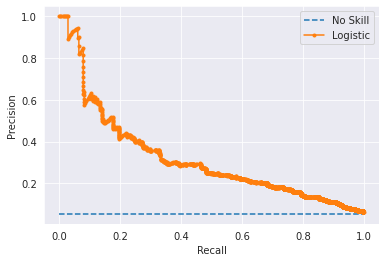

In [ ]:
# Precision and Recall
yhat = model_xgb.predict(X_test.values)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
xb_f1, xb_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (xb_f1, xb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model Evaluation

In [ ]:
# Model Evaluation Comparasion table
data = [{'No Skills':lr_ns_auc, 'Logistics': lr_sc_auc, 'F1':lr_f1, 'AUC':lr_auc},
        {'No Skills':rf_ns_auc, 'Logistics': rf_sc_auc, 'F1':rf_f1, 'AUC':rf_auc},
        {'No Skills':nb_ns_auc, 'Logistics': nb_sc_auc, 'F1':nb_f1, 'AUC':nb_auc},
        {'No Skills':xb_ns_auc, 'Logistics': xb_sc_auc, 'F1':xb_f1, 'AUC':xb_auc}]
pd.DataFrame(data, index=['logistics Regression',
                         'Random Forest',
                         'Naive Bayes',
                         'XGBoost'])

No Skills  Logistics        F1       AUC
logistics Regression        0.5   0.728879  0.041237  0.229657
Random Forest               0.5   0.821738  0.115385  0.250649
Naive Bayes                 0.5   0.787763  0.256532  0.250977
XGBoost                     0.5   0.846573  0.120000  0.321264

# Scoring Test

In [ ]:
# import library lime for testing 
!pip install lime

import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['NonFraud', 'Fraud'],
    mode='classification'
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = model_RF.predict(X_test)
np.where(model==1)

(array([ 126,  264,  289,  367,  395,  442,  515,  669,  936, 1008, 1491,
        1510, 1591, 1641, 1695, 1876, 2017, 2199, 3185, 3421, 4218, 4388,
        4466, 4503, 4778, 4802, 4878, 4969, 5057, 5071, 5168, 5216]),)

In [ ]:
# Display data from row 5
# Inverse the encoded
df_obj = X_test.select_dtypes(include='int')
df_float = X_test.select_dtypes(include='float')

data = df_obj.apply(lambda x: d[x.name].inverse_transform(x))
data = df_float.join(data)
data.iloc[[126,4878]]

Dollar_Amount  Total_Amount_of_Transaction_in_1_Day Transaction_Type  \
3636          212.75                                212.75           swiped   
34500         158.53                               1756.36           swiped   

                Store_Type Cardholder_Region         Country Trans_Weekend  \
3636      Retail - Apparel                SE  European Union       Weekday   
34500  Retail - Drug Store                NW            Asia       Weekend   

      Trans_Night  
3636        Night  
34500       Night

In [ ]:
# model score and explanation  
exp = explainer.explain_instance(
    data_row=X_test.iloc[126].values, 
    predict_fn=model_RF.predict_proba,
    num_features=10,
)

exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0  Total_Amount_of_Transaction_in_1_Day <= 305.39      0.073228
1                 0.00 < Transaction_Type <= 1.00      0.062804
2                          Dollar_Amount > 187.01      0.026137
3                          1.00 < Country <= 3.00     -0.025332
4                           Trans_Weekend <= 0.00     -0.007573
5                      0.00 < Trans_Night <= 1.00      0.006778
6                3.00 < Cardholder_Region <= 5.00      0.003368
7                     10.00 < Store_Type <= 17.00      0.002772

In [ ]:
# model score and explanation 2 
exp = explainer.explain_instance(
    data_row=X_test.iloc[4878].values, 
    predict_fn=model_RF.predict_proba,
    num_features=10,
)

exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0  Total_Amount_of_Transaction_in_1_Day > 797.84      0.088341
1                0.00 < Transaction_Type <= 1.00      0.066508
2                                Country <= 1.00      0.031432
3                   0.00 < Trans_Weekend <= 1.00      0.008437
4                    10.00 < Store_Type <= 17.00      0.006179
5               144.83 < Dollar_Amount <= 163.28     -0.002602
6               1.00 < Cardholder_Region <= 3.00      0.001809
7                     0.00 < Trans_Night <= 1.00      0.001635

In [ ]:
#load dataset using pandas
predict  = model_xgb.predict(X_test.values)
score_prediction = model_xgb.predict_proba(X_test.values)

data = {'Dollar_Amount' : X_test['Dollar_Amount'],
        'Prediction': predict,
        'NonFraud' : score_prediction[:,0],
        'Fraud': score_prediction[:,1]}

data_predict = pd.DataFrame(data, index=X_test.index)

df_obj = X_test.select_dtypes(include='int')
df_float = X_test.select_dtypes(include='float')

data = df_obj.apply(lambda x: d[x.name].inverse_transform(x))
data = df_float.join(data)

dfNew = pd.merge(data, data_predict, left_index=True, right_index=True)

# replace JobSatisfaction value into categorical
dfNew['Prediction'] = dfNew['Prediction'].replace([0,1], 
                                          ['Non Fraud', 'Fraud'])

dfNew.to_csv("Attrition.csv")

In [ ]:
dfNew

Dollar_Amount_x  Total_Amount_of_Transaction_in_1_Day Transaction_Type  \
33988           143.29                                143.29           swiped   
24908           159.45                                159.45            keyed   
42140           140.26                                439.63            keyed   
38281           122.65                                248.86            keyed   
20074           133.18                                497.93            keyed   
...                ...                                   ...              ...   
47009           190.42                               1059.57            keyed   
21054           150.90                                505.11            keyed   
44428           151.46                                355.36            keyed   
34371           137.45                                258.09           swiped   
33631           146.30                                419.05           swiped   

                                Store_Type Cardholder_Region         Country  \
33988                       ATM Withdrawel                NE             USA   
24908                       ATM Withdrawel                NE             USA   
42140                              Grocery                NW  European Union   
38281                              Medical                 E            Asia   
20074               Entertainment and Arts                 S             USA   
...                                    ...               ...             ...   
47009                                  Gas                 S             USA   
21054            Retail - Home Improvement                 N  European Union   
44428                   Retail - Furniture                 S  European Union   
34371  Retail - Office and School Supplies                SW  European Union   
33631                       ATM Withdrawel                 W  European Union   

      Trans_Weekend Trans_Night  Dollar_Amount_y Prediction  NonFraud  \
33988       Weekday         Day           143.29  Non Fraud  0.914682   
24908       Weekend       Night           159.45  Non Fraud  0.939817   
42140       Weekday         Day           140.26  Non Fraud  0.994322   
38281       Weekday       Night           122.65  Non Fraud  0.982976   
20074       Weekday       Night           133.18  Non Fraud  0.994805   
...             ...         ...              ...        ...       ...   
47009       Weekday         Day           190.42  Non Fraud  0.988337   
21054       Weekend       Night           150.90  Non Fraud  0.994153   
44428       Weekday         Day           151.46  Non Fraud  0.992409   
34371       Weekday         Day           137.45  Non Fraud  0.942285   
33631       Weekday       Night           146.30  Non Fraud  0.974756   

          Fraud  
33988  0.085318  
24908  0.060183  
42140  0.005678  
38281  0.017024  
20074  0.005195  
...         ...  
47009  0.011663  
21054  0.005847  
44428  0.007591  
34371  0.057715  
33631  0.025244  

[5227 rows x 12 columns]

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model_RF)

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
X_test.iloc[126]

Dollar_Amount                           212.75
Total_Amount_of_Transaction_in_1_Day    212.75
Transaction_Type                          1.00
Store_Type                               11.00
Cardholder_Region                         5.00
Country                                   2.00
Trans_Weekend                             0.00
Trans_Night                               1.00
Name: 3636, dtype: float64

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
X_test.iloc[4878]

Dollar_Amount                            158.53
Total_Amount_of_Transaction_in_1_Day    1756.36
Transaction_Type                           1.00
Store_Type                                14.00
Cardholder_Region                          3.00
Country                                    0.00
Trans_Weekend                              1.00
Trans_Night                                1.00
Name: 34500, dtype: float64

In [ ]:
# Calculate Shap values
choosen_instance = X_test.loc[[3636]]
shap_values = explainer.shap_values(choosen_instance)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

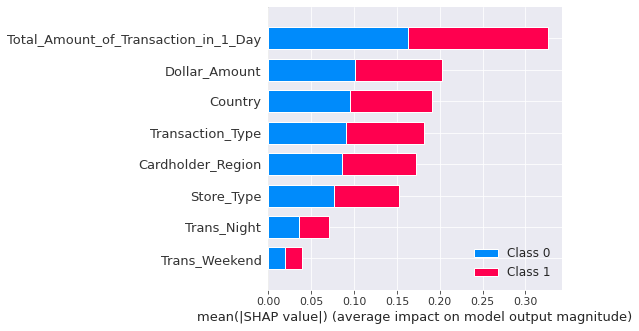

In [ ]:
# summary plot 
shap.summary_plot(shap_values, X_train)

In [ ]:
# Calculate Shap values 
choosen_instance = X_test.loc[[34500]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

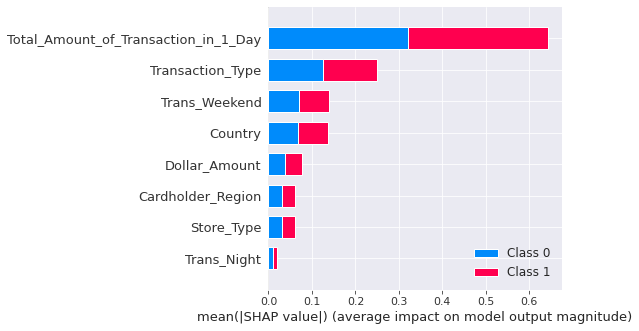

In [ ]:
# summary plot for analysis of the global effect of the features we can use the following plots.
shap.summary_plot(shap_values, X_train)

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model_RF.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 5228it [35:04,  2.48it/s]


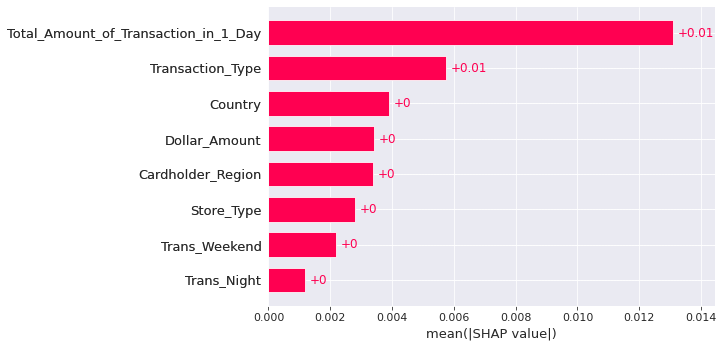

In [ ]:
# bar plots for analysis of the global effect of the features we can use the following plots.
shap.plots.bar(shap_values)

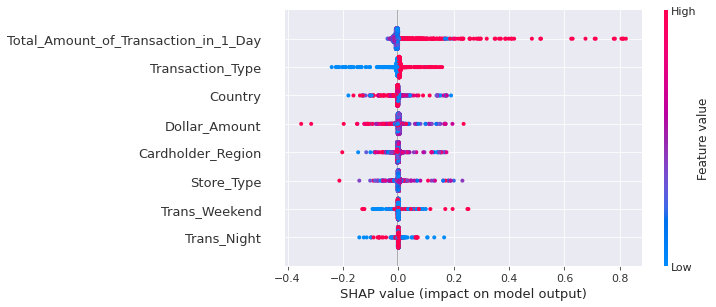

In [ ]:
# beeswarm plot for show an affect feature by observation
shap.plots.beeswarm(shap_values)

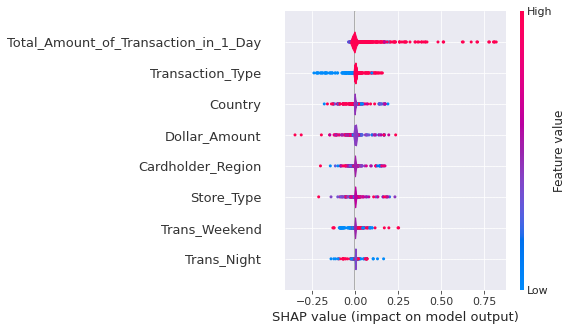

In [ ]:
# summary plot by violin
shap.summary_plot(shap_values, plot_type='violin')

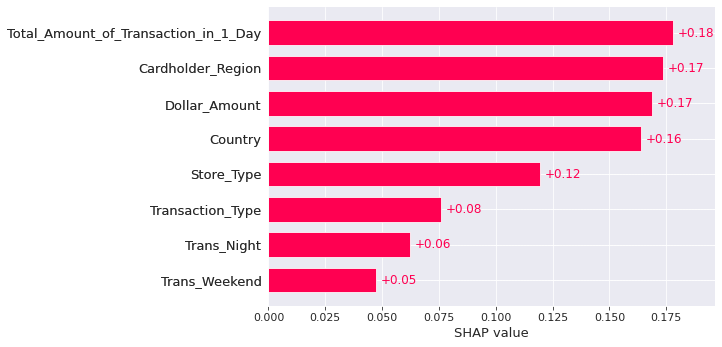

In [ ]:
# bar plots
shap.plots.bar(shap_values[126])

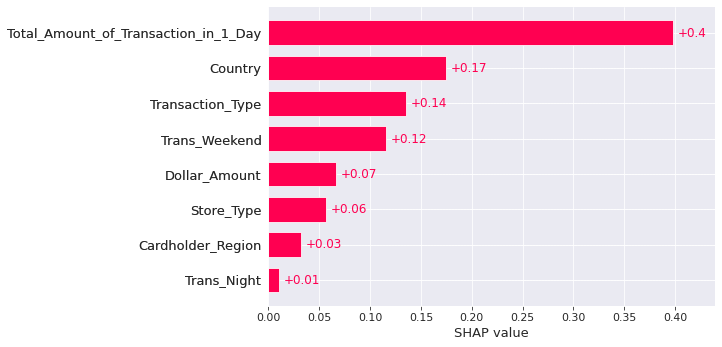

In [ ]:
# bar plots
shap.plots.bar(shap_values[4878])

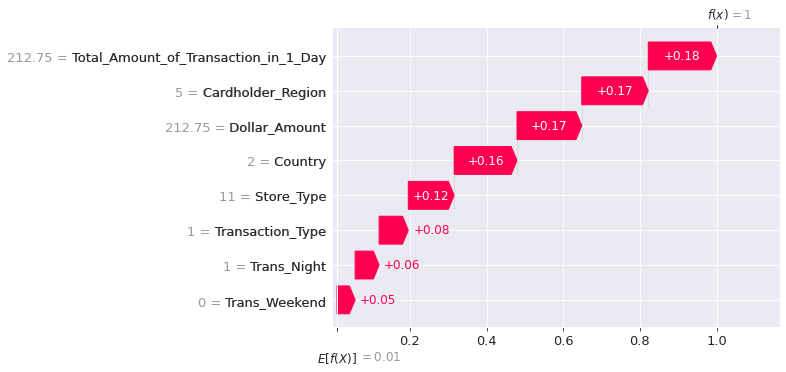

In [ ]:
# waterfall plot 
shap.initjs()
shap.plots.waterfall(shap_values[126])

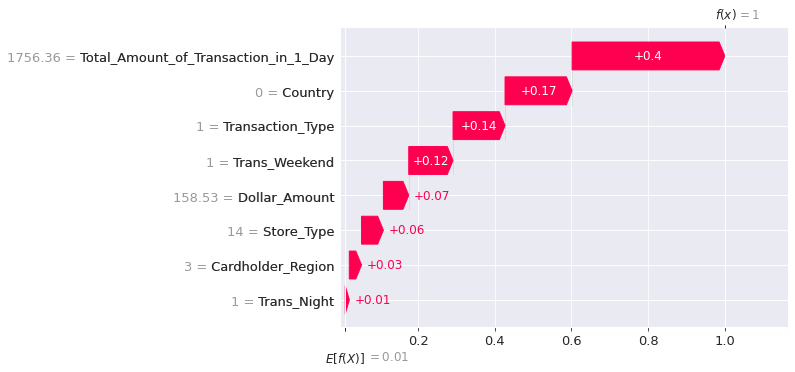

In [ ]:
# waterfall plot 
shap.initjs()
shap.plots.waterfall(shap_values[4878])

In [ ]:
# force plot
shap.initjs()
shap.plots.force(shap_values[[126]])

In [ ]:
# force plot
shap.initjs()
shap.plots.force(shap_values[[4878]])